<a href="https://colab.research.google.com/github/Pushkarp26/Machine-Learning-of-energy-use-of-appliances-in-alow-energy-house/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import math
from google.colab import files
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

#**Data**
From the previous notebooks I have saved the predictor and target feature datasets.
So, will use them directly here instead of doing all the preliminary steps.

In [2]:
X = pd.read_csv("predictor.csv")
y = pd.read_csv("target.csv")
X.drop("Unnamed: 0",axis=1,inplace=True)
y.drop("Unnamed: 0",axis=1,inplace=True)

print("Predictor features:\n {}\n\nTarget Features:\n {}".format(X.head(),y.head()))

Predictor features:
    Kitchen_Temp  Kitchen_Humidity  Living_room_Temp  ...        rv2  Weekday    NSM
0         19.89         47.596667              19.2  ...  13.275433        0  61200
1         19.89         46.693333              19.2  ...  18.606195        0  61800
2         19.89         46.300000              19.2  ...  28.642668        0  62400
3         19.89         46.066667              19.2  ...  45.410389        0  63000
4         19.89         46.333333              19.2  ...  10.084097        0  63600

[5 rows x 28 columns]

Target Features:
    Total_Energy_Consumption
0                        90
1                        90
2                        80
3                        90
4                       100


Splitting the data into Training and Testing sets.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

y_array = np.asarray(y)
y_array = y_array.ravel()

X_train,X_test,y_train,y_test = train_test_split(X,y_array,test_size=0.3)
print("X_train:",X_train.shape,"\t","y_train:",y_train.shape,"\n",'X_test:',
       X_test.shape,"\t","y_test:",y_test.shape)

X_train: (13814, 28) 	 y_train: (13814,) 
 X_test: (5921, 28) 	 y_test: (5921,)


#**Base Model**



In [4]:
rfc = RandomForestRegressor(n_estimators=10,random_state=42)
rfc.fit(X_train,y_train)                                                         #training the model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Checking the *Accuracy* score of our model

In [5]:
print("Accuracy Score for Train data: {}\n Accuracy Score for Test data: {}".
      format(rfc.score(X_train,y_train),rfc.score(X_test,y_test)))                                                      #

Accuracy Score for Train data: 0.9168053652207019
 Accuracy Score for Test data: 0.5072553383812364


Evaluating errors

In [6]:
from sklearn import metrics
pred = rfc.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))   #mean absolute error
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))     #mean squared error
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(
    y_test, pred)))                                                              #Root Mean Squared Error 
# mape = np.mean(np.abs((y_test - pred) / np.abs(y_test)))
# print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
# print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 33.95304847154197
Mean Squared Error (MSE): 5197.778753588921
Root Mean Squared Error (RMSE): 72.09562229143265


In [ ]:
rfc.feature_importances_

#**RandomSearchCV**

In [7]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 110, num = 22)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [8]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = 
                               random_grid, n_iter = 100, cv = 3, verbose=2,
                               random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 51.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [9]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 95,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 90}

In [10]:
rf_random.cv_results_

{'mean_fit_time': array([13.12455487,  2.25265598,  5.55732878, 23.45112459, 20.83736928,
        15.5560387 , 19.67029802, 19.89149364,  3.78837689,  4.04957962,
         4.19595305,  3.43577409, 23.63997944,  7.96654741,  6.84023746,
        41.9470698 ,  0.52737506,  9.70415314, 18.84645788,  4.52477241,
         1.8793985 , 15.55802743, 57.89466317,  4.66512354, 13.47888064,
         8.7053175 ,  5.93826151,  9.78717931, 13.5316058 ,  8.0925649 ,
        34.92166289, 72.29638108, 57.6315434 , 19.57127492, 58.35762088,
        16.27198458, 37.85721906,  6.50802207,  5.7166121 ,  3.58560173,
         8.31108713,  7.40071114, 15.44127369,  1.99584047,  0.8998824 ,
        58.3212707 , 30.67680248, 84.50672873, 29.41982404, 10.19383113,
        54.57426405, 43.38954385,  9.1398557 ,  1.82320635,  9.22768656,
         7.52515864, 76.76180879, 29.25792233,  7.80749249,  2.70281688,
         6.45068717,  4.95062915,  7.25501728,  3.26990207, 28.71688739,
         9.65387408,  8.29794749, 

#**Evaluation Function**

In [11]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

#####**Evaluate the Default Model**


In [12]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 33.9530 degrees.
Accuracy = 66.89%.


#####**Evaluate the Best Random Search Model**


In [13]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 28.8483 degrees.
Accuracy = 72.39%.


In [14]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 8.23%.


#**Grid Search**


We can now perform grid search building on the result from the random search. We will test a range of hyperparameters around the best values returned by random search.

In [15]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [100,110,120,130,140,150],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 4, 6],
    'n_estimators': [80, 100, 110, 120]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [16]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 369 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 53.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [17]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 110}

#####**Evaluate the Best Model from Grid Search**


In [18]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 28.9535 degrees.
Accuracy = 72.27%.


In [19]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) /
                                        base_accuracy))


Improvement of 8.04%.


#**Modelling and Prediction of best model**

In [21]:
model = RandomForestRegressor(bootstrap= False,max_depth= 95,
                              max_features= 'sqrt',min_samples_leaf= 1,
                              min_samples_split= 2,n_estimators= 90,
                              random_state= 42,criterion= 'mse')
model.fit(X_train, y_train)

yhat = model.predict(X_test)
predicted_values = pd.DataFrame(model.predict(X_test),columns=["Predicted Values"])

actual_values = pd.DataFrame(y_test,columns=["Actual Values"])
comparision = actual_values.join(predicted_values)
print("COMPARISION OF ACTUAL AND PREDICTED VALUES OF THE MODEL:\n{}".
      format(comparision))

COMPARISION OF ACTUAL AND PREDICTED VALUES OF THE MODEL:
      Actual Values  Predicted Values
0               130        172.333333
1                30         32.888889
2                30         45.222222
3                30         50.222222
4                80         73.333333
...             ...               ...
5916             80         73.444444
5917             60         52.111111
5918            190        181.555556
5919             50         35.888889
5920             50         56.888889

[5921 rows x 2 columns]


In [65]:
comparision.columns.values

array(['Actual Values', 'Predicted Values'], dtype=object)

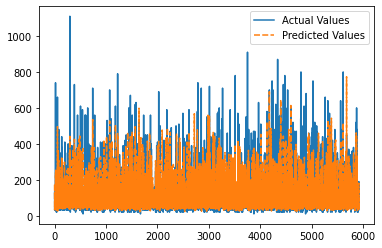

In [57]:
sns.lineplot(data=comparision)

In [23]:
print("Accuracy Score for Train data: {}\n Accuracy Score for Test data: {}".
      format(model.score(X_train,y_train),model.score(X_test,y_test)))

Accuracy Score for Train data: 0.9999999998381294
 Accuracy Score for Test data: 0.6137059352144565


In [24]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, yhat))   #mean absolute error
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, yhat))     #mean squared error
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(
    y_test, yhat)))

Mean Absolute Error (MAE): 29.018240162134774
Mean Squared Error (MSE): 4074.871305522716
Root Mean Squared Error (RMSE): 63.83471865311788


In [49]:
Feature_importance = pd.DataFrame()
Feature_importance["Features"] = X_train.columns
Feature_importance["Importance"] = model.feature_importances_
Feature_importance.sort_values(by=['Importance'],ascending=False,inplace=True,
                               ignore_index=True)
print("Feature Importance from High to Low")
Feature_importance

Feature Importance from High to Low


,Features,Importance
0,NSM,0.121893
1,Laundry_room_Humidity,0.042942
2,Outside_Press,0.042607
3,Kitchen_Humidity,0.042328
4,Bathroom_Humidity,0.039878
5,Ironing _room_Humidity,0.039493
6,Laundry_room Temp,0.039088
7,Parents_room_Humidity,0.038264
8,Childrens_room_Humidity,0.038257
9,Living_room_Humidity,0.038171


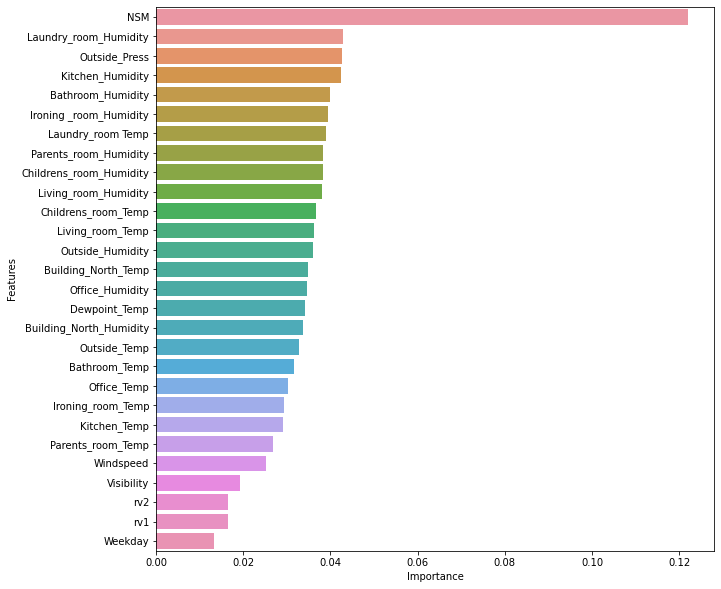

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.barplot(data=Feature_importance,x='Importance',y='Features')